In [1]:
import graphviz

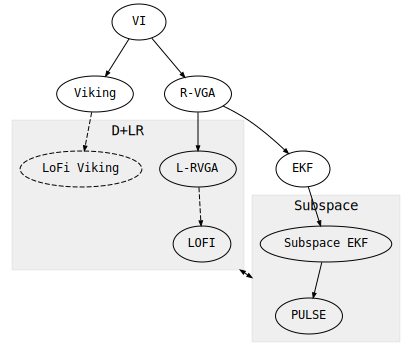

In [116]:
node_attr = {
    "fontname": "Monospace",
    "fontsize": "12pt"
}

g = graphviz.Digraph("subspace", filename="subspace.gv", node_attr=node_attr)

g.attr(
    compound="true",
    fontname="Monospace",
    arrowsize="0.5",
    rankdir="TD",
    # ranksep="1.1",
    # nodesep="0.1",
)

g.attr("edge", arrowsize='0.5')



g.edge("VI", "R-VGA")
g.node("Viking")
g.edge("VI", "Viking")


with g.subgraph(name="Cluster:D+LR") as c:
    c.attr(label="D+LR", color="#00000010", style="filled")
    c.node("LoFi Viking", style="dashed")
    c.edge("L-RVGA", "LOFI", style="dashed")

g.edge("Viking", "LoFi Viking", style="dashed")
g.edge("R-VGA", "L-RVGA")
g.edge("R-VGA", "EKF")


with g.subgraph(name="Cluster:subspace") as c:
    c.attr(label="Subspace", color="#00000010", style="filled")
    c.node("Subspace EKF")
    c.edge("Subspace EKF", "PULSE")


g.edge("EKF", "Subspace EKF")
# Connect subgraphs
g.edge(
    'LOFI', 'PULSE', ltail='Cluster:D+LR', lhead='Cluster:subspace', style="dashed", dir="both",
)

g